**（1）任务描述**

* 波士顿房价预测模型是基于波士顿房价的历史数据建立的一种预测模型，能够较为准确地预测波士顿未来房价的走势。
* 通过对波士顿历史房价数据进行拟合，建立一个基于房价因素的模型。
* 通过该模型，我们能够预测未来房价走向，为投资者带来更多的投资机会。
* 波士顿房价数据集共506行,每行14列。前13列用来描述房屋的各种信息，最后一列为该类房屋价格中位数。
* 通过实验基本理解常用的回归模型及其使用，掌握回归方法的使用，并对回归结果进行评价、分析与总结。

**（2）实验步骤**

1. 导入数据；
1. 拆分数据（70%作为训练样本，30%作为测试样本）；
1. 对数据标准化；
1. 使用数据降维方法对数据进行降维；
1. 模型训练；
1. 模型评估。

**（3）要求**
* 使用四种以上模型训练模型（如：线性回归、支持向量回归、决策回归、集成学习、神经网络等），对比它们在测试集上的性能表现（R2系数），并对结果进行分析与讨论。
* 务必输出对比分析结果以及最终所有模型的平均R2系数。


# 1 准备阶段

## 1.1 导入必要的包文件

In [1]:
import numpy as np
import paddle
from paddle import fluid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
# 训练的数据集
boston = load_boston()
X = boston.data
y = boston.target

## 1.2 拆分数据

In [2]:
# 把这些数据拆分为数据集和训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 标准化我们的数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1.3 主成分分析法进行降维

In [3]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# 2 模型训练

## 2.1 线性回归

In [4]:
# 线性回归
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

## 2.2 支持向量回归

In [5]:
# 支持向量回归
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_r2 = r2_score(y_test, svr_y_pred)

## 2.3 决策树回归

In [7]:
# 决策树回归
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_y_pred)

## 2.4 神经网络回归

In [8]:
# 神经网络回归
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_r2 = r2_score(y_test, nn_y_pred)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 3 模型评估

## 3.1 R2系数的输出

In [9]:
models = ['线性回归', '支持向量机', '决策树', '神经网络']
r2_scores = [lr_r2, svr_r2, dt_r2, nn_r2]

for i in range(len(models)):
    print(f'{models[i]} R2 系数为: {r2_scores[i]}')

avg_r2 = np.mean(r2_scores)
print(f'平均 R2 系数为: {avg_r2}')

线性回归 R2 系数为: 0.647331433535006
支持向量机 R2 系数为: 0.6373595878650562
决策树 R2 系数为: 0.6541591668385272
神经网络 R2 系数为: 0.8193996205017716
平均 R2 系数为: 0.6895624521850903


## 3.2 图表展示

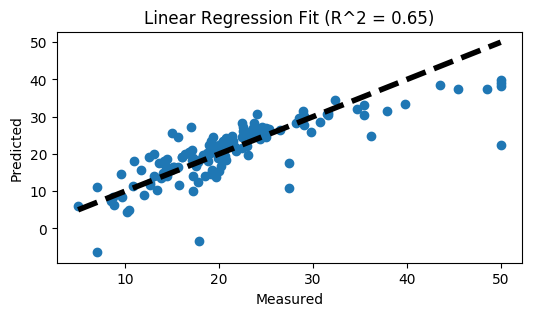

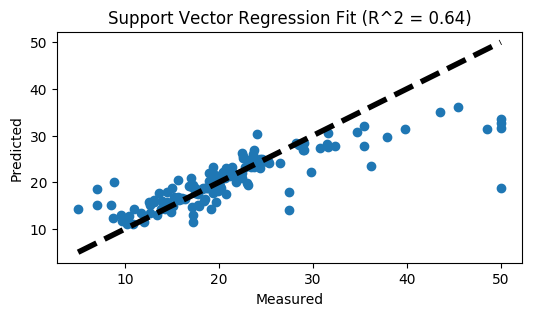

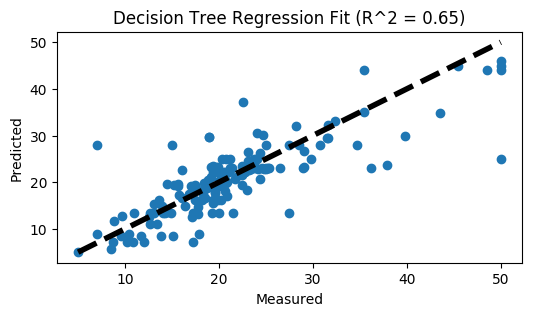

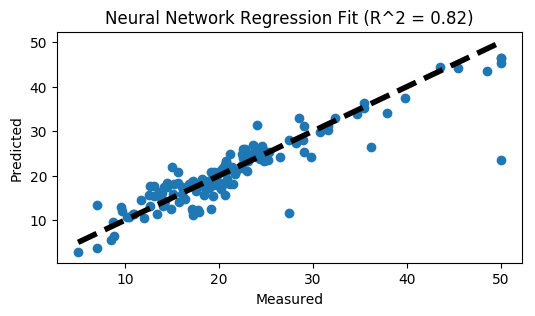

In [14]:
import matplotlib.pyplot as plt

'''
1. 这里没有中文选项，所以图的标题我使用了对应的英文
2. 把这四个图放一起起到的对比效果更佳，可以看出神经网络的回归效果最好
'''

# 绘制线性回归模型的拟合曲线
plt.figure(figsize=(6, 3))
plt.scatter(y_test, lr_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Fit (R^2 = {:.2f})'.format(lr_r2))
plt.show()

# 绘制支持向量机模型的拟合曲线
plt.figure(figsize=(6, 3))
plt.scatter(y_test, svr_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Support Vector Regression Fit (R^2 = {:.2f})'.format(svr_r2))
plt.show()

# 绘制决策树模型的拟合曲线
plt.figure(figsize=(6, 3))
plt.scatter(y_test, dt_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression Fit (R^2 = {:.2f})'.format(dt_r2))
plt.show()

# 绘制神经网络模型的拟合曲线
plt.figure(figsize=(6, 3))
plt.scatter(y_test, nn_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Fit (R^2 = {:.2f})'.format(nn_r2))
plt.show()

# 4 结果分析

## 4.1 R2系数的作用
R²（R-squared），也被称为决定系数或拟合优度，是统计学中用于衡量回归模型拟合效果的一个指标。它是观测值围绕回归线的变异性与围绕其平均值的变异性之比的调整形式。R²的取值范围在0到1之间，但有时也可能出现负值。**其值越接近1，表示模型的解释变量（即自变量）对因变量的变异性的解释能力越强，模型的拟合效果越好**。如果R²等于1，意味着模型可以完美预测因变量；而如果R²等于0，则模型的预测能力并不比简单使用因变量的平均值来预测更好。当R²小于0时，这通常意味着模型的预测效果甚至不如直接使用平均值，这种情况通常出现在模型过拟合或者模型选择不当的情况下。
综上，可以认定为**R2系数越大的回归模型越好**


## 4.2 性能分析
在我们使用`R2`系数进行对比后，`R2`越大的那个回归模型拟合效果越好。无论是从图上看出还是从输出的数据上，都可以发现神经网络回归的拟合效果最好，其它三种(线性回归、支持向量机、决策树回归）的拟合效果基本一致。

## 4.3 原因分析
对于线性回归来说，最常见的算法应该就是最小二乘法，最小二乘法可以说是简单而且十分常见的算法了。因此，其实可以将这个算法作为回归模型的损失函数，然后从这个算法出发，只要最小化这个损失函数即可。而且从这个结果上分析，我认为支持向量机回归、决策树回归这两种方法或多或少都使用了最小二乘法，因此它们三种回归模型之间的R2系数几乎相同。而神经网络却更具有更加复杂的参数和训练时间，所以神经网络的效果从理论上是最好的